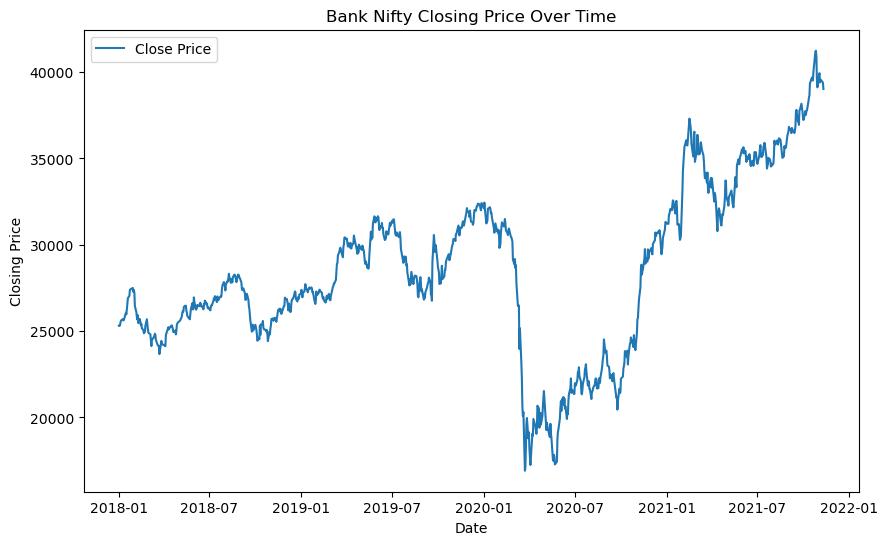

Correlation Matrix:
            Open      High       Low    Volume     Close
Open    1.000000  0.998450  0.998377 -0.015550  0.996935
High    0.998450  1.000000  0.997454  0.002973  0.998613
Low     0.998377  0.997454  1.000000 -0.034157  0.998401
Volume -0.015550  0.002973 -0.034157  1.000000 -0.014774
Close   0.996935  0.998613  0.998401 -0.014774  1.000000


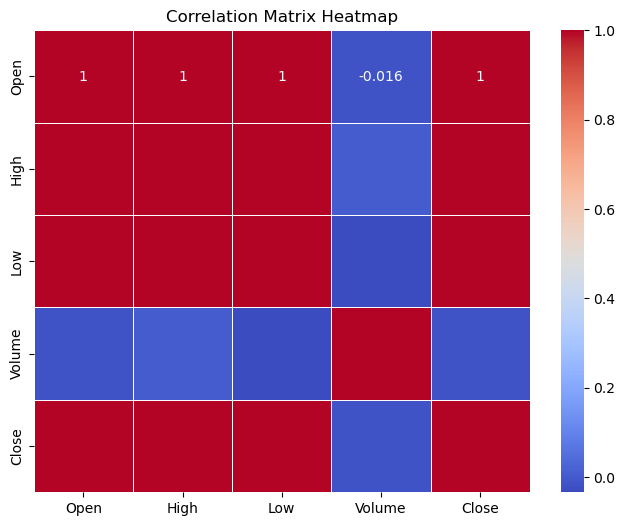

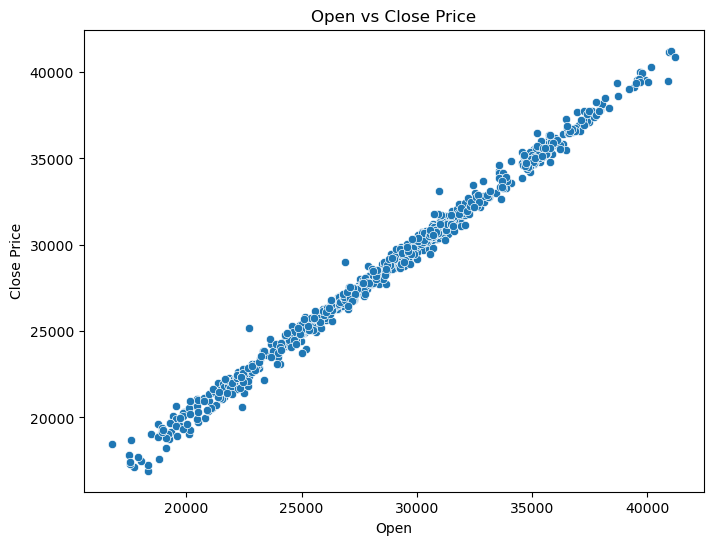

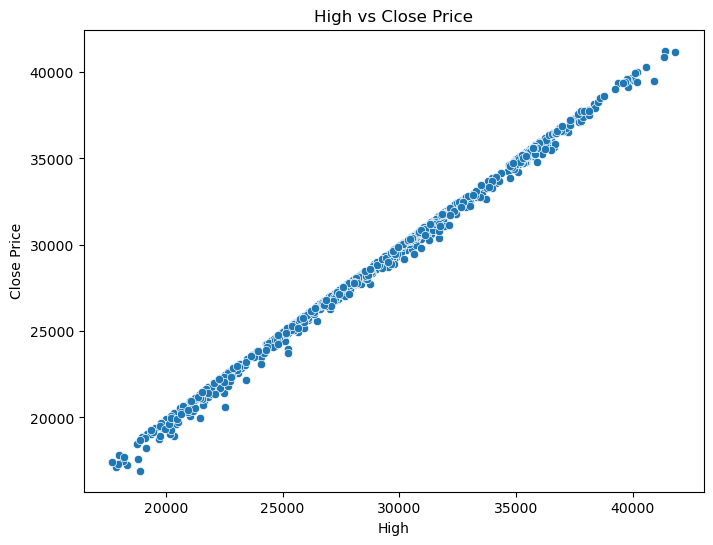

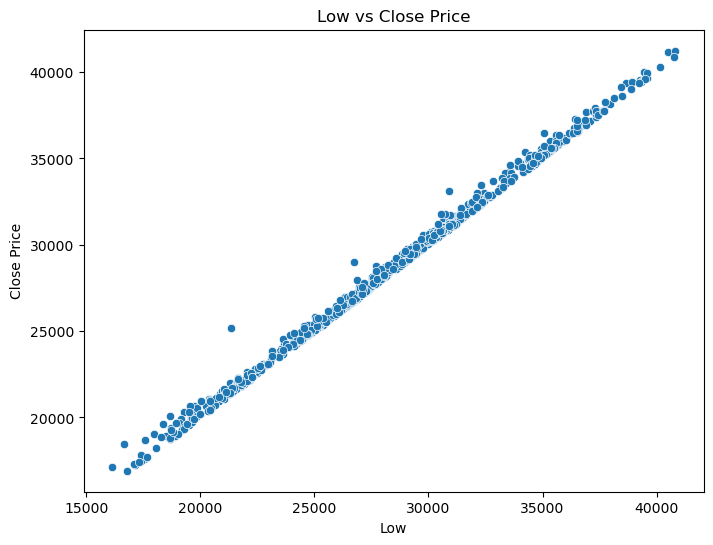

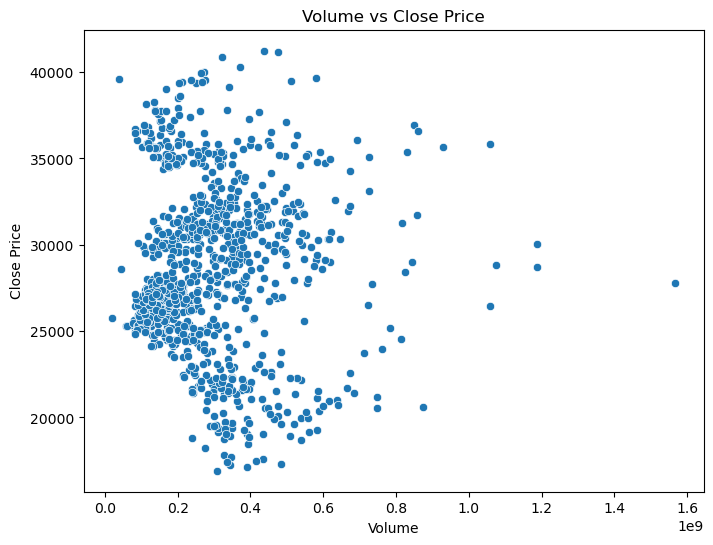

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

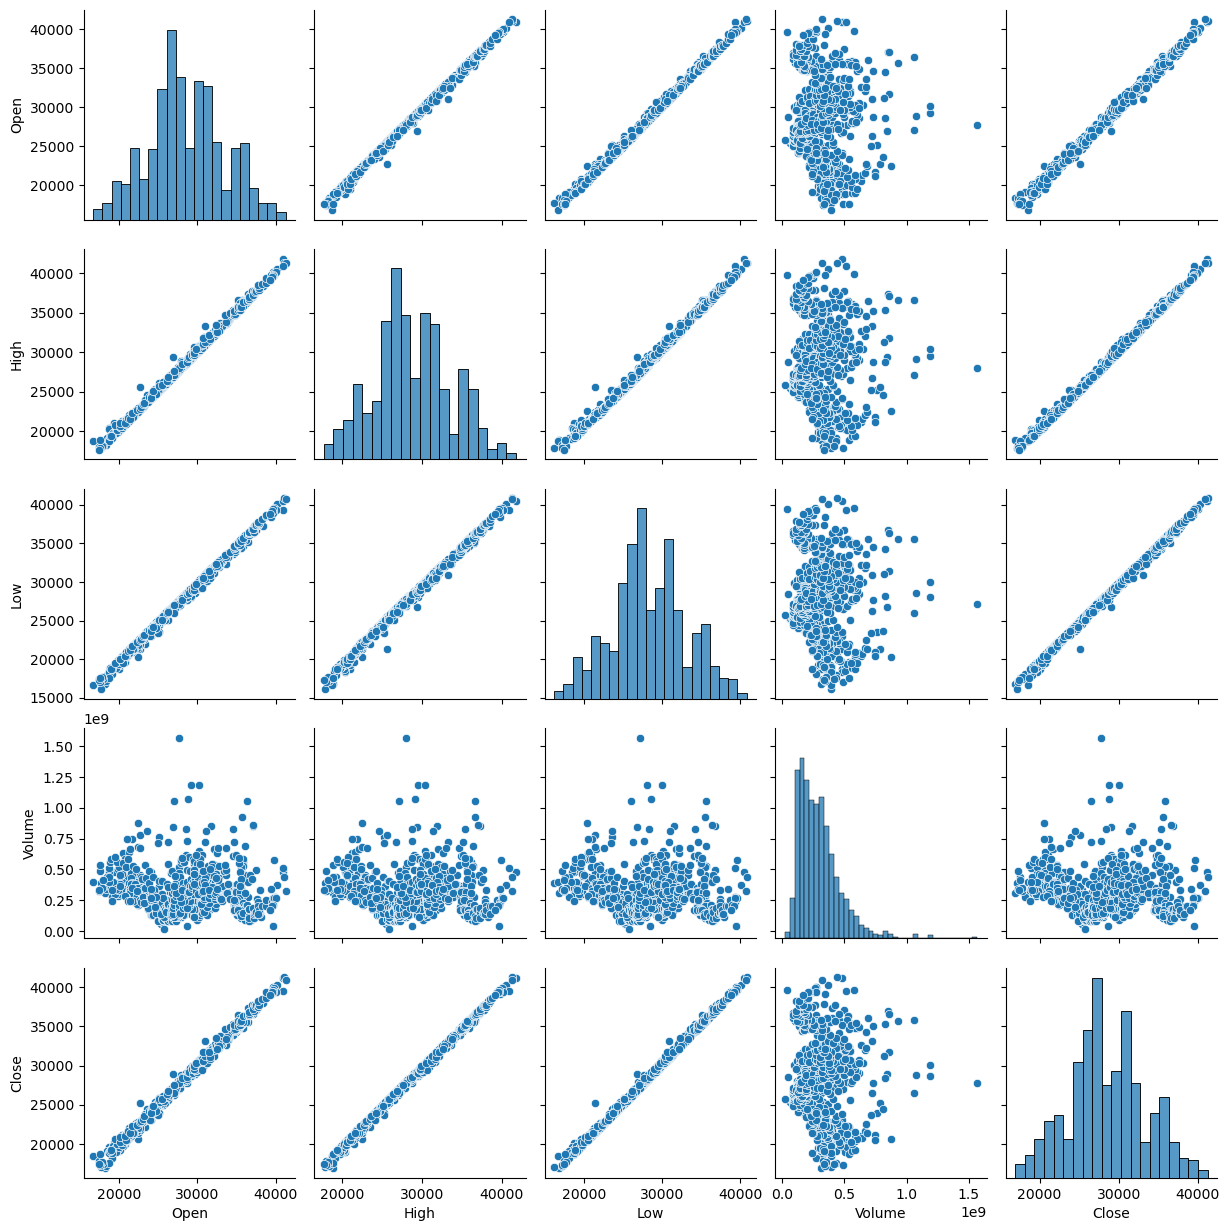

Mean Squared Error: 18132.63358906403
Model Coefficients: [-6.51720188e-01  9.00487439e-01  7.51586057e-01 -6.45196585e-08]
Intercept: -11.620774971237552


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = r"C:\Users\manohar\OneDrive\Documents\bank_nifty.csv"
data = pd.read_csv(file_path)

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Clean the data by replacing '-' with NaN and dropping rows with NaN values
data_cleaned = data.replace('-', pd.NA).dropna()

# Convert columns to numeric where applicable
data_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']] = data_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)

# Plot the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['Date'], data_cleaned['Close'], label='Close Price')
plt.title('Bank Nifty Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Calculate the correlation matrix
correlation_matrix = data_cleaned[['Open', 'High', 'Low', 'Volume', 'Close']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualize the relationship between each independent variable and the target variable (Close Price)
for column in ['Open', 'High', 'Low', 'Volume']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_cleaned[column], y=data_cleaned['Close'])
    plt.title(f'{column} vs Close Price')
    plt.xlabel(column)
    plt.ylabel('Close Price')
    plt.show()

# Pairplot to visualize pairwise relationships between variables
sns.pairplot(data_cleaned[['Open', 'High', 'Low', 'Volume', 'Close']])
plt.show()

# Prepare the data for machine learning
X = data_cleaned[['Open', 'High', 'Low', 'Volume']]  # Features
y = data_cleaned['Close']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the model's performance
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
